# <font color='red'>**Transformer implementation**</font>

<font color='blue'>**Load the data**</font>

In [ ]:
import pandas as pd
import numpy as np
import re

In [ ]:
def decontractions(phrase):
    """decontracted takes text and convert contractions into natural form.
     ref: https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python/47091490#47091490"""
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"won\’t", "will not", phrase)
    phrase = re.sub(r"can\’t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)

    phrase = re.sub(r"n\’t", " not", phrase)
    phrase = re.sub(r"\’re", " are", phrase)
    phrase = re.sub(r"\’s", " is", phrase)
    phrase = re.sub(r"\’d", " would", phrase)
    phrase = re.sub(r"\’ll", " will", phrase)
    phrase = re.sub(r"\’t", " not", phrase)
    phrase = re.sub(r"\’ve", " have", phrase)
    phrase = re.sub(r"\’m", " am", phrase)

    return phrase

def preprocess(text):
    # convert all the text into lower letters
    # use this function to remove the contractions: https://gist.github.com/anandborad/d410a49a493b56dace4f814ab5325bbd
    # remove all the spacial characters: except space ' '
    text = text.lower()
    text = decontractions(text)
    text = re.sub('[^A-Za-z0-9 ]+', '', text)
    text = text.split()
    text = " ".join(text)
    return text



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pickle
data = pickle.load(open('/content/drive/MyDrive/Case Study2/data','rb'))

In [ ]:
data

,enc_gen,enc_inp,dec_inp,dec_gen
0,f,Can we make this quick? Roxanne Korrine and A...,"Well, I thought we'd start with pronunciation,...",m
1,m,"Well, I thought we'd start with pronunciation,...",Not the hacking and gagging and spitting part....,f
2,f,Not the hacking and gagging and spitting part....,Okay... then how 'bout we try out some French ...,m
3,f,You're asking me out. That's so cute. What's ...,Forget it.,m
4,f,"No, no, it's my fault -- we didn't have a prop...",Cameron.,m
...,...,...,...,...
221611,gender,"Your orders, Mr Vereker?",I'm to take the Sikali with the main column to...,gender
221612,gender,I'm to take the Sikali with the main column to...,Lord Chelmsford seems to want me to stay back ...,gender
221613,gender,Lord Chelmsford seems to want me to stay back ...,I think Chelmsford wants a good man on the bor...,gender
221614,gender,"Well I assure you, Sir, I have no desire to cr...","And I assure you, you do not In fact I'd be ob...",gender


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
#Preprocessing the Data dataframe
data['enc_inp'] = data['enc_inp'].apply(preprocess)
data['dec_inp'] = data['dec_inp'].apply(preprocess)
data.head()

,enc_gen,enc_inp,dec_inp,dec_gen
0,f,can we make this quick roxanne korrine and and...,well i thought we would start with pronunciati...,m
1,m,well i thought we would start with pronunciati...,not the hacking and gagging and spitting part ...,f
2,f,not the hacking and gagging and spitting part ...,okay then how bout we try out some french cuis...,m
3,f,you are asking me out that is so cute what is ...,forget it,m
4,f,no no it is my fault we did not have a proper ...,cameron,m


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
data['enc_inp_len'] = data['enc_inp'].str.split().apply(len)
data = data.loc[(data['enc_inp_len'] <= 20 ) & (data['enc_inp_len'] > 2)]

data['dec_inp_len'] = data['dec_inp'].str.split().apply(len)
data = data.loc[(data['dec_inp_len'] <= 20) & (data['dec_inp_len'] > 2)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
preprocess_data = data
preprocess_data.to_pickle('/content/drive/MyDrive/Case Study2/preprocess_data')

In [ ]:
del data

In [ ]:
preprocess_data['dec_input'] = '<start> ' + preprocess_data['dec_inp'].astype(str)
preprocess_data['dec_output'] = preprocess_data['dec_inp'].astype(str) + ' <end>'


preprocess_data = preprocess_data.drop(['dec_inp','dec_inp_len','enc_inp_len'], axis=1)
preprocess_data.head()

,enc_gen,enc_inp,dec_gen,dec_input,dec_output
1,m,well i thought we would start with pronunciati...,f,<start> not the hacking and gagging and spitti...,not the hacking and gagging and spitting part ...
2,f,not the hacking and gagging and spitting part ...,m,<start> okay then how bout we try out some fre...,okay then how bout we try out some french cuis...
9,f,gosh if only we could find kat a boyfriend,m,<start> let me see what i can do,let me see what i can do <end>
10,f,cesc ma tete this is my head,m,<start> right see you are ready for the quiz,right see you are ready for the quiz <end>
14,f,how is our little find the wench a date plan p...,m,<start> well there is someone i think might be,well there is someone i think might be <end>


In [ ]:
pickle.dump((preprocess_data),open('/content/drive/MyDrive/Case Study2/preprocess_data.pkl','wb'))

In [ ]:
#Splitting data into train and validation 
from sklearn.model_selection import train_test_split
train, validation = train_test_split(preprocess_data, test_size=0.2)

In [ ]:
import re

# Performing Sub() operation
def strip_gender(txt):

  res_1 = re.sub('<m> ', '', txt)
  res_1 = re.sub('<f> ', '', res_1)
  res_1 = re.sub('<gender> ', '', res_1)

  return res_1

In [ ]:
pickle.dump((train,validation),open('/content/drive/MyDrive/Case Study2/data_split.pkl','wb'))

In [ ]:
import pickle
train,validation = pickle.load(open('/content/drive/MyDrive/Case Study2/data_split.pkl','rb'))

In [ ]:
# for one sentence we will be adding <end> token so that the tokanizer learns the word <end>
# with this we can use only one tokenizer for both encoder output and decoder output
train.iloc[0]['dec_input']= str(train.iloc[0]['dec_input'])+' <end>'
train.iloc[0]['dec_output']= str(train.iloc[0]['dec_output'])+' <end>'

In [ ]:
#train.enc_inp = train.enc_inp.apply(strip_gender)
#validation.enc_inp = validation.enc_inp.apply(strip_gender)
train

,enc_gen,enc_inp,dec_gen,dec_input,dec_output
42487,m,why does he call sanderson,f,<start> he is one of the best chess players in...,he is one of the best chess players in the wor...
80493,f,she thinks he is a pig,f,<start> he is a real piece o work i wish you c...,he is a real piece o work i wish you could mee...
11452,f,i think therefore i am,m,<start> very good pris now show him why,very good pris now show him why <end>
84468,gender,why did not you drop any sail,gender,<start> skipper called us out of the rigging,skipper called us out of the rigging <end>
82596,f,oh my god,m,<start> son of a bitchin lowlife putrid scum,son of a bitchin lowlife putrid scum <end>
...,...,...,...,...,...
118166,gender,i bought everything you put on the list gloves...,m,<start> why should i have to put it on the lis...,why should i have to put it on the list it is ...
151284,m,that is right,f,<start> king of the housecalls master of the l...,king of the housecalls master of the living ro...
127644,f,oh my god i thought,m,<start> i would taken the mask,i would taken the mask <end>
137435,gender,what is that,gender,<start> that is six hundred pounds harry two h...,that is six hundred pounds harry two hundred t...


In [ ]:
enc_inp_len = train['enc_inp'].str.split().apply(len)
dec_inp_len = train['dec_input'].str.split().apply(len)

#99 percentile of english and italian sentences length

print('90 percentile of encoder input and decoder input sentences length %d and %d'%(np.percentile(enc_inp_len,100),np.percentile(dec_inp_len,100)))

90 percentile of encoder input and decoder input sentences length 20 and 21


In [ ]:
all_text = list(train.enc_inp.values)
all_text.extend(list(train.dec_input))
all_text.extend(list(train.dec_output))

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer = Tokenizer(num_words = 10002 + 1,oov_token= '<unk>', filters = '' )

tokenizer.fit_on_texts(all_text)



In [ ]:
tokenizer.word_index['<start>'], tokenizer.word_index['<end>']

(5, 4)

In [ ]:
tokenizer.word_index['<unk>']

1

In [ ]:
vocab_size_dec=len(tokenizer.word_index.keys())
print(vocab_size_dec)


36906


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_enc = tokenizer.texts_to_sequences(train.enc_inp)
train_dec_input = tokenizer.texts_to_sequences(train.dec_input)
train_dec_output = tokenizer.texts_to_sequences(train.dec_output)

validation_enc = tokenizer.texts_to_sequences(validation.enc_inp)
validation_dec_input = tokenizer.texts_to_sequences(validation.dec_input)
validation_dec_output = tokenizer.texts_to_sequences(validation.dec_output)

In [ ]:
train_enc = pad_sequences(train_enc,maxlen = 20, padding='post')
train_dec_input = pad_sequences(train_dec_input,maxlen = 20, padding='post')
train_dec_output = pad_sequences(train_dec_output,maxlen = 20, padding='post')

validation_enc = pad_sequences(validation_enc,maxlen = 21, padding='post')
validation_dec_input = pad_sequences(validation_dec_input,maxlen = 21, padding='post')
validation_dec_output = pad_sequences(validation_dec_output,maxlen = 21, padding='post')

In [ ]:
np.max(train_enc), np.max(train_dec_input), np.max(train_dec_output)

(10002, 10002, 10002)

In [ ]:
train_enc.shape

(92858, 20)

In [ ]:
#Getting the training data sets for models
x_tr,y_tr = [train_enc[:-186],train_dec_input[:-186]],train_dec_output[:-186]

## <font color='blue'>**Implement custom encoder decoder**</font>

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
from  tensorflow.keras.layers import LSTM, Embedding, Dense, BatchNormalization

<font color='blue'>**Encoder**</font>

In [ ]:
class Encoder(tf.keras.Model):
    '''
    Encoder model -- That takes a input sequence and returns encoder-outputs,encoder_final_state_h,encoder_final_state_c
    '''

    def __init__(self,inp_vocab_size,embedding_size,lstm_size,input_length):

        #Initialize Embedding layer
        #Intialize Encoder LSTM layer

        super().__init__()
        self.vocab_size = inp_vocab_size
        self.embedding_dim = embedding_size
        self.input_length = input_length
        self.enc_units= lstm_size
        self.lstm_output = 0
        self.lstm_state_h=0
        self.lstm_state_c=0

        self.embedding = Embedding(input_dim=self.vocab_size, output_dim=self.embedding_dim, input_length=self.input_length,
                           mask_zero=True, name="embedding_layer_encoder")
        
        self.lstm = LSTM(self.enc_units, return_state=True, return_sequences=True,name="Encoder_LSTM")

    def call(self,input_sequence,states):
        '''
          This function takes a sequence input and the initial states of the encoder.
          Pass the input_sequence input to the Embedding layer, Pass the embedding layer ouput to encoder_lstm
          returns -- encoder_output, last time step's hidden and cell state
        '''
        input_sentence = self.embedding(input_sequence)
        lstm_output,state_h,state_c = self.lstm(input_sentence,initial_state=states)

        return lstm_output,state_h,state_c
        

      

    
    def initialize_states(self,batch_size):
      '''
      Given a batch size it will return intial hidden state and intial cell state.
      If batch size is 32- Hidden state is zeros of size [32,lstm_units], cell state zeros is of size [32,lstm_units]
      '''
      self.batch_size = batch_size
      return (tf.zeros([batch_size,self.enc_units]),
             tf.zeros([batch_size,self.enc_units]))
      


<font color='orange'>**Grader function - 1**</font>

In [ ]:
class Decoder(tf.keras.Model):
    '''
    Encoder model -- That takes a input sequence and returns output sequence
    '''

    def __init__(self,out_vocab_size,embedding_size,lstm_size,input_length):

        #Initialize Embedding layer
        #Intialize Decoder LSTM layer
        super().__init__()
        self.vocab_size = out_vocab_size #Vocab size of output text (English)
        self.embedding_dim = embedding_size
        self.dec_units = lstm_size
        self.input_length = input_length

        self.embedding = Embedding(input_dim=self.vocab_size, output_dim=self.embedding_dim, input_length=self.input_length,
                           mask_zero=True, name="embedding_layer_decoder")#,weights=[embedding_matrix], trainable=False)
        
        self.lstm = LSTM(self.dec_units, return_state=True, return_sequences=True, name="Decoder_LSTM")


    def call(self,input_sequence,initial_states):
        '''
          This function takes a sequence input and the initial states of the encoder.
          Pass the input_sequence input to the Embedding layer, Pass the embedding layer ouput to decoder_lstm
        
          returns -- decoder_output,decoder_final_state_h,decoder_final_state_c
        '''

        input_sentence = self.embedding(input_sequence)
        lstm_output,state_h,state_c = self.lstm(input_sentence,initial_state=initial_states)

        return lstm_output,state_h,state_c


      


<font color='orange'>**Grader function - 2**</font>

In [ ]:
class Encoder_decoder(tf.keras.Model):
    
    def __init__(self,encoder_inputs_length,decoder_inputs_length, output_vocab_size,batch_size):
        
        super().__init__()
        
        
                        
        #Create encoder object
        #Create decoder object
        #Intialize Dense layer(out_vocab_size) with activation = 'softmax'
        
        self.encoder = Encoder(inp_vocab_size = output_vocab_size+1 ,embedding_size = 500,lstm_size = 500,
                               input_length=encoder_inputs_length)
        
        self.decoder = Decoder(out_vocab_size = output_vocab_size+1 ,embedding_size = 500,lstm_size= 500,
                               input_length = decoder_inputs_length)
        
        self.dense = Dense(output_vocab_size+1,activation='softmax')
        
        self.states = self.encoder.initialize_states(batch_size)
    
    def call(self,data):
        '''
        A. Pass the input sequence to Encoder layer -- Return encoder_output,encoder_final_state_h,encoder_final_state_c
        B. Pass the target sequence to Decoder layer with intial states as encoder_final_state_h,encoder_final_state_C
        C. Pass the decoder_outputs into Dense layer 
        
        Return decoder_outputs
        '''
        
        input,output = data[0], data[1]
        encoder_output, encoder_h, encoder_c = self.encoder(input,self.states)
        decoder_output,dec_state_h,dec_state_c = self.decoder(output, [encoder_h, encoder_c])
        #decoder_output = BatchNormalization()(decoder_output)
        
        output = self.dense(decoder_output)
        
        return output
        

# Padding and tokenizing

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard

filepath = 'task-1/weight_best.hdf5'

#checkpoint_1 = ModelCheckpoint(filepath=filepath, monitor='accuracy', save_best_only=True, mode='auto')
log_dir = 'logs'
tensorboard = TensorBoard(log_dir= log_dir, histogram_freq= 1, write_graph= True)

callbacks = [tensorboard]

In [ ]:
#x_val,y_val = [validation_enc[:-195],validation_dec_input[:-195]],validation_dec_output[:-195]

In [ ]:
vocab_size_dec  = 10002

In [ ]:
#Create an object of encoder_decoder Model class, 
# Compile the model and fit the model 

model  = Encoder_decoder(encoder_inputs_length=20,decoder_inputs_length=21,output_vocab_size=vocab_size_dec, 
                         batch_size = 512)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.009,clipvalue=.5)
model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics = ['accuracy'])


In [ ]:

train_steps=train.shape[0]//1027
#valid_steps=validation.shape[0]//1024

model.fit(x_tr,y_tr,steps_per_epoch=128,batch_size= 512, epochs= 30,callbacks= callbacks)



Epoch 1/30
128/128 [==============================] - 53s 412ms/step - loss: 2.9431 - accuracy: 0.1379
Epoch 2/30
128/128 [==============================] - 52s 404ms/step - loss: 2.6638 - accuracy: 0.1775
Epoch 3/30
128/128 [==============================] - 51s 401ms/step - loss: 2.5930 - accuracy: 0.1934
Epoch 4/30
128/128 [==============================] - 51s 402ms/step - loss: 2.3751 - accuracy: 0.2089
Epoch 5/30
128/128 [==============================] - 53s 411ms/step - loss: 2.1818 - accuracy: 0.2298
Epoch 6/30
128/128 [==============================] - 51s 401ms/step - loss: 2.1008 - accuracy: 0.2393
Epoch 7/30
128/128 [==============================] - 51s 402ms/step - loss: 2.0588 - accuracy: 0.2445
Epoch 8/30
128/128 [==============================] - 51s 402ms/step - loss: 1.9788 - accuracy: 0.2517
Epoch 9/30
128/128 [==============================] - 51s 402ms/step - loss: 1.9413 - accuracy: 0.2555
Epoch 10/30
128/128 [==============================] - 51s 401ms/step - l

In [ ]:
import tensorflow, tensorboard
%reload_ext tensorboard
%tensorboard --logdir logs/

In [ ]:
#1000 random test  sentences
indexes = np.random.randint(0,len(train),1000)
enc_sentences = [train.enc_inp.values[i] for i in indexes]
target_sent = [train.dec_output.values[i].strip(" <end>") for i in indexes]

In [ ]:
#1000 random test  sentences
indexes = np.random.randint(0,len(validation),1000)
enc_sentences = [validation.enc_inp.values[i] for i in indexes]
target_sent = [validation.dec_output.values[i].strip(" <end>") for i in indexes]

In [ ]:
'''def evaluate_beam(input_sentence, beam_index = 3):

    start = [tokenizer.word_index['<start>']]
    
    # result[0][0] = index of the starting word
    # result[0][1] = probability of the word predicted
    result = [[start, 0.0]]

    #attention_plot = np.zeros((max_length, attention_features_shape))

    #hidden = decoder.reset_state(batch_size=1)

    #temp_input = tf.expand_dims(load_image(image)[0], 0)
    #img_tensor_val = image_features_extract_model(temp_input)
    #img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))

    #features = encoder(img_tensor_val)

    #dec_input = tf.expand_dims([tkenizer_dec.word_index['<start>']], 0)




    encoder_units = 500
    
    text = preprocess(input_sentence)
    
    text = [tokenizer.word_index[i] for i in text.split(" ") if i in tokenizer.word_index.keys()]
    
    text = tf.keras.preprocessing.sequence.pad_sequences([text],
                                                         maxlen=25,padding='post')
    
    enc_out, enc_h,enc_c = model.layers[0](text, [tf.zeros((1, encoder_units)),tf.zeros((1, encoder_units))])
    
    states_values = [enc_h, enc_c ]


    while len(result[0][0]) <= 25:
        i=0
        temp = []
        for s in result:
          #print("s: ", s)
          #print("rsult: ",s[0],len(result),s[0][-1])

          #print(dec_input)
          dec_input = tf.expand_dims([s[0][-1]] , 0)

          lstm_input = model.layers[1].embedding(dec_input)

          

          predictions, dec_h, dec_c = model.layers[1].lstm(lstm_input, initial_state = states_values)
          
          states_values = [dec_h, dec_c]
          #attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()
          i=i+1
          # Getting the top <beam_index>(n) predictions
          predictions = -1 * np.log(predictions[0][0])
          word_preds = np.argsort(predictions)#[:beam_index]
          #print("top words :",word_preds)
          # creating a new list so as to put them via the model again

          for w in word_preds:

            next_cap, prob = s[0][:], s[1]
            next_cap.append(w)
            prob += predictions[w]
            temp.append([next_cap, prob])
            
        result = temp
          #print(temp)
          # Sorting according to the probabilities
        result = sorted(result, reverse=False, key=lambda l: l[1])
          # Getting the top words
        result = result[:beam_index]
          #print(result[-1][0])
        predicted_id = result[-1] # with Max Probability
          
        pred_list = predicted_id[0]
        #print(pred_list)
        prd_id = pred_list[-1]
        #print("pred_id : ",prd_id)
          #dec_input = tf.expand_dims([prd_id], 0)
        
        if(prd_id!=3):
          dec_input = tf.expand_dims([prd_id], 0)  # Decoder input is the word predicted with highest probability among the top_k words predicted
        else:
          break

    result = result[-1][0]
  
    intermediate_caption = [tokenizer.index_word[i] for i in result]
    final_caption = []
    for i in intermediate_caption:
        if i != '<end>':
            final_caption.append(i)
            
        else:
            break

    #attention_plot = attention_plot[:len(result), :]
    final_caption = ' '.join(final_caption[1:])
    return final_caption#,attention_plot'''

In [ ]:
def predict(input_sentence):


    encoder_units = 500
    
    text = preprocess(input_sentence)
    #print(text)
    
    text = [tokenizer.word_index[i] for i in text.split(" ") if i in tokenizer.word_index.keys()]
    
    text = tf.keras.preprocessing.sequence.pad_sequences([text],
                                                         maxlen=25,padding='post')
    
    enc_out, enc_h,enc_c = model.layers[0](text, [tf.zeros((1, encoder_units)),tf.zeros((1, encoder_units))])
     
    cur_vec = tf.expand_dims([tokenizer.word_index['<start>']] , 0)
    states_values = [enc_h, enc_c ] 
    
    sentence = []

    for i in range(21):# Since output has max 26 words
        
        cur_emb = model.layers[1].embedding(cur_vec)

        infe_output, state_h, state_c = model.layers[1].lstm(cur_emb, initial_state=states_values)
        infe_output = model.layers[2](infe_output)
        
        states_values = [state_h, state_c]
        cur_vec = np.reshape(np.argmax(infe_output), (1, 1))
        word = tokenizer.index_word[np.argmax(infe_output)]
        
        if word == '<end>': 
            #sentence.append(word) 
            break # to end the loop while '<end>' is the return
            
        sentence.append(word)
        
    return " ".join(sentence)






In [ ]:
# Predict on 1000 random sentences on test data and calculate the average BLEU score of these sentences.
# https://www.nltk.org/_modules/nltk/translate/bleu_score.html

import warnings
warnings.filterwarnings('ignore')
import nltk.translate.bleu_score as bleu

In [ ]:
enc_sentences[0]

'i just swore my life away back in that'

In [ ]:
#Predicting using normal search
pred = predict(enc_sentences[0])
pred

'i am not going to get you to the party'

In [ ]:
#Predicting using normal search
pred = predict("How are you")
pred

'i am not sure'

In [ ]:
#Predicting using normal search
pred = predict("you want cofee")
pred

'i am not sure'

In [ ]:
#Predicting using normal search
pred = predict("do you like swimming")
pred

'no i am not'

In [ ]:
#Predicting using normal search
pred = predict("do you like running")
pred

'no i am not'

In [ ]:
#Predicting using normal search
pred = predict("do you love me")
pred

'i am not sure'

In [ ]:
#Predicting using normal search
pred = predict("foot ball is great")
pred

'i do not know'

In [ ]:
#Predicting using normal search
pred = predict("President Elon Musk is legend")
pred

'i am not sure'

In [ ]:
#Predicting using normal search
print(enc_sentences[0]," ", target_sent[0] )
pred = predict(enc_sentences[0])
pred

i just swore my life away back in that   mornin chessyhow is the back


'i am not going to get you to the party'

In [ ]:
#Predicting using normal search
i = 100

print(" Input Sentence : ",enc_sentences[i],"\n Target :", target_sent[i] )
pred = predict(enc_sentences[i])
print(" \n Output : ", pred)

 Input Sentence :  if it is that is pretty high up on the totem pole what do you think 
 Target : gimmie a minut
 
 Output :  i am not going to faint but i am not interested in my life


In [ ]:
#Predicting using normal search
i = 101

print(" Input Sentence : ",enc_sentences[i],"\n Target :", target_sent[i] )
pred = predict(enc_sentences[i])
print(" \n Output : ", pred)

 Input Sentence :  you are not on that soap opera thing again are you cause you know what that is 
 Target : it is people with no lives watching other people is fake lives
 
 Output :  i am not going to get a walk with him


In [ ]:
#Predicting using normal search
i = 456

print(" Input Sentence : ",enc_sentences[i],"\n Target :", target_sent[i] )
pred = predict(enc_sentences[i])
print(" \n Output : ", pred)

 Input Sentence :  what do you think of me 
 Target : what do you mea
 
 Output :  i am not going to get a walk with him


In [ ]:
#Predicting using normal search
pred = predict("what do you mea")
pred

'i am not going to <unk> the sensation'

In [ ]:
#Predicting using normal search
pred = predict("i am not going to <unk> the sensation")
pred

'you are a <unk>'

In [ ]:
#Getting The Bleu Score

score = 0

for i in range(1000):
    
    pred = predict(enc_sentences[i]).split()
    ref = [target_sent[i].split(),]
    score += bleu.sentence_bleu(ref, pred)
    
print("Average belu score for 1000 test setences :",score/1000)

Average belu score for 1000 test setences : 0.20464810010495127


In [ ]:
class Encoder(tf.keras.Model):
    '''
    Encoder model -- That takes a input sequence and returns output sequence
    '''

    def __init__(self,inp_vocab_size,embedding_size,lstm_size,input_length):

        #Initialize Embedding layer
        #Intialize Encoder LSTM layer
        super().__init__()
        self.lstm_output = 0
        self.lstm_state_h = 0
        self.lstm_state_c = 0 
        self.vocab_size = inp_vocab_size
        self.embedding_dim = embedding_size
        self.input_length = input_length
        self.enc_units= lstm_size
        
        self.embedding = Embedding(input_dim = self.vocab_size, output_dim = self.embedding_dim,input_length = self.input_length , 
                              mask_zero = True, name = 'encoder_embedding_1')
        
        self.lstm = LSTM(self.enc_units,return_sequences = True, return_state= True, name = 'encoder_LSTM_1')

    def call(self,input_sequence,states):
        
        '''
          This function takes a sequence input and the initial states of the encoder.
          Pass the input_sequence input to the Embedding layer, Pass the embedding layer ouput to encoder_lstm
          returns -- All encoder_outputs, last time steps hidden and cell state
        '''
        input_sentence = self.embedding(input_sequence)
        
        self.lstm_output,self.lstm_state_h,self.lstm_state_c = self.lstm(input_sentence,initial_state=states)
        
        return self.lstm_output, self.lstm_state_h,self.lstm_state_c
    
    def initialize_states(self,batch_size):
        
        '''
        Given a batch size it will return intial hidden state and intial cell state.
        If batch size is 32- Hidden state is zeros of size [32,lstm_units], cell state zeros is of size [32,lstm_units]
        '''
        
        self.batch_size = batch_size
        
        return(tf.zeros([self.batch_size,self.enc_units]),
             tf.zeros([self.batch_size,self.enc_units]))
      


In [ ]:
class Attention(tf.keras.layers.Layer):
    '''
    Class the calculates score based on the scoring_function using Bahdanu attention mechanism.
    '''
    def __init__(self,scoring_function, att_units):
        
        super(Attention,self).__init__()
    # Please go through the reference notebook and research paper to complete the scoring functions
    
        self.scoring_function = scoring_function
        
        if self.scoring_function=='dot':
          # Intialize variables needed for Dot score function here

            pass
        
        if scoring_function == 'general':
          # Intialize variables needed for General score function here

            self.w = Dense(att_units)
            
            pass
        
        elif scoring_function == 'concat':
          # Intialize variables needed for Concat score function here

            self.w1 = Dense(att_units)
            self.w2 = Dense(att_units)
            self.v = Dense(1)
            
            pass


    def call(self,decoder_hidden_state,encoder_output):
        '''
          Attention mechanism takes two inputs current step -- decoder_hidden_state and all the encoder_outputs.
          * Based on the scoring function we will find the score or similarity between decoder_hidden_state and encoder_output.
            Multiply the score function with your encoder_outputs to get the context vector.
            Function returns context vector and attention weights(softmax - scores)
        '''

        if self.scoring_function == 'dot':
            # Implement Dot score function here
            
            query_with_time_axis = tf.expand_dims(decoder_hidden_state,-1)  
            score = tf.matmul(encoder_output,query_with_time_axis) 
            attention_weight = tf.nn.softmax(score,axis=1)
            context_vector = attention_weight*encoder_output
            context_vector = tf.reduce_sum(context_vector,axis=1)
            
            pass
        elif self.scoring_function == 'general':
            # Implement General score function here
            
            decoder_hidden_state = tf.expand_dims(decoder_hidden_state,-1)
            score = self.w(encoder_output)
            score = tf.matmul(score,decoder_hidden_state)
            attention_weight = tf.nn.softmax(score,axis=1)
            context_vector = attention_weight*encoder_output
            context_vector = tf.reduce_sum(context_vector,axis=1)
            
            pass
        elif self.scoring_function == 'concat':
            # Implement General score function here
            
            decoder_hidden_state = tf.expand_dims(decoder_hidden_state,1)
            score = self.v(tf.nn.tanh(self.w1(decoder_hidden_state) + self.w2(encoder_output)))
            attention_weight = tf.nn.softmax(score,axis=1)
            context_vector = attention_weight* encoder_output
            context_vector = tf.reduce_sum(context_vector,axis=1)
            
            pass
        
        return context_vector,attention_weight



In [ ]:
class OneStepDecoder(tf.keras.Model):
    def __init__(self,out_vocab_size, embedding_dim, input_length, dec_units ,score_fun ,att_units):
        super(OneStepDecoder,self).__init__()
        
        # Initialize decoder embedding layer, LSTM and any other objects needed
        self.vocab_size = out_vocab_size #vocab_size eng
        self.embedding_dim = embedding_dim
        self.input_length = input_length
        
        self.embedding = Embedding(input_dim=self.vocab_size,output_dim=self.embedding_dim,input_length=self.input_length)
                           
        
        self.lstm = LSTM(dec_units,return_state=True,
                                   return_sequences = True)

        self.dense = Dense(self.vocab_size)


        self.attention = Attention(score_fun,att_units)


    def call(self,input_to_decoder, encoder_output, state_h,state_c):
        '''
            One step decoder mechanisim step by step:
          A. Pass the input_to_decoder to the embedding layer and then get the output(batch_size,1,embedding_dim)
          B. Using the encoder_output and decoder hidden state, compute the context vector.
          C. Concat the context vector with the step A output
          D. Pass the Step-C output to LSTM/GRU and get the decoder output and states(hidden and cell state)
          E. Pass the decoder output to dense layer(vocab size) and store the result into output.
          F. Return the states from step D, output from Step E, attention weights from Step -B
        '''

        output = self.embedding(input_to_decoder)
        
        #print(" Shape out put in OSD", output.shape)

        context_vector,attention_weight = self.attention.call(state_h,encoder_output)
        
        concatenated = tf.concat([tf.expand_dims(context_vector, 1), output], axis=-1)
        
        decoder_output,state_h,state_c =  self.lstm(concatenated,initial_state = [state_h,state_c])
        
        decoder_output = tf.reshape(decoder_output, (-1, decoder_output.shape[2]))
        
        output = self.dense(decoder_output)

        return output,state_h,state_c,attention_weight,context_vector


In [ ]:
class Decoder(tf.keras.Model):
    def __init__(self,out_vocab_size, embedding_dim, input_length, dec_units ,score_fun ,att_units):
      #Intialize necessary variables and create an object from the class onestepdecoder
    
        super(Decoder,self).__init__()
        self.vocab_size = out_vocab_size
        self.embedding_dim = embedding_dim
        self.input_length = input_length#
        self.score_fun = score_fun
        self.dec_units= dec_units
        self.att_units = att_units

        self.onestepdecoder = OneStepDecoder(self.vocab_size, self.embedding_dim, self.input_length, self.dec_units,
                                             self.score_fun ,self.att_units)
    
    def call(self, input_to_decoder,encoder_output,decoder_hidden_state,decoder_cell_state ):

        #Initialize an empty Tensor array, that will store the outputs at each and every time step
        #Create a tensor array as shown in the reference notebook

        #Iterate till the length of the decoder input
            # Call onestepdecoder for each token in decoder_input
            # Store the output in tensorarray
        # Return the tensor array
        
        _tensor = tf.TensorArray(tf.float32,size=input_to_decoder.shape[1])
        
        for timestep in range(input_to_decoder.shape[1]):
            
            output,decoder_hidden_state ,decoder_cell_state,attention_weights,context_vector = self.onestepdecoder\
            .call(input_to_decoder[:,timestep:timestep+1], encoder_output,decoder_hidden_state,decoder_cell_state)
            
            _tensor = _tensor.write(timestep,output)
            
        _tensor = tf.transpose(_tensor.stack(),[1,0,2])
        
        return _tensor

        
    

In [ ]:
class encoder_decoder(tf.keras.Model):
    def __init__(self,lstm_size,encoder_input_length,\
                 decoder_input_length,score ,att_unit,batch_size,input_vocab_size,out_vocab_size ):
    #Intialize objects from encoder decoder
        super().__init__()
        self.batch_size = batch_size
        self.lstm_size = lstm_size #Encoder lstm units
        self.att_unit = att_unit #decoder lstm units
        self.input_vocab_size = input_vocab_size + 1 # Vocab size of italian 
        self.out_vocab_size = out_vocab_size +1 # Voacb size of eng

        self.encoder = Encoder(inp_vocab_size = self.input_vocab_size ,embedding_size = 300,lstm_size = self.lstm_size,
                               input_length=encoder_input_length)
                 
        self.decoder = Decoder(out_vocab_size = self.out_vocab_size, embedding_dim = 300, \
                               input_length = decoder_input_length, dec_units =  self.lstm_size ,score_fun= score ,att_units =self.att_unit)
        
        #self.dense = Dense(vocab_size_eng,activation='softmax')

    def call(self,data):
    #Intialize encoder states, Pass the encoder_sequence to the embedding layer
    # Decoder initial states are encoder final states, Initia
                 #lize it accordingly
    # Pass the decoder sequence,encoder_output,decoder states to Decoder
    # return the decoder output

        input ,output = data[0],data[1]        

        initital_state = self.encoder.initialize_states(self.batch_size)
        
        encoder_output,encoder_state_h,encoder_state_c = self.encoder.call(input,initital_state)
        
        output = self.decoder(output,encoder_output,encoder_state_h,encoder_state_c)
        
        #decoder_output = BatchNormalization()(decoder_output)
        #output = self.dense(output)
        return output

In [ ]:
#https://www.tensorflow.org/tutorials/text/image_captioning#model
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')


def loss_function(real, pred):
    """ Custom loss function that will not consider the loss for padded zeros.
    why are we using this, can't we use simple sparse categorical crossentropy?
    Yes, you can use simple sparse categorical crossentropy as loss like we did in task-1. But in this loss function we are ignoring the loss
    for the padded zeros. i.e when the input is zero then we donot need to worry what the output is. This padded zeros are added from our end
    during preprocessing to make equal length for all the sentences.

    """
    
    
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_mean(loss_)
    

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard


log_dir = 'logs_1'
tensorboard_1 = TensorBoard(log_dir= log_dir, histogram_freq= 1, write_graph= True)

callbacks = [tensorboard_1]

In [ ]:
#Call back function for Learning rate reducion
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='accuracy',factor=0.5,patience= 2,
                              min_lr=0.0001)

In [ ]:
#Create an object of encoder_decoder Model class, 
# Compile the model and fit the model 
vocab_size_dec  = 10002

model_2  = encoder_decoder(lstm_size = 256,encoder_input_length=20 ,decoder_input_length=21,score ='concat',att_unit = 256,batch_size = 512,
                           input_vocab_size = vocab_size_dec,out_vocab_size = vocab_size_dec)

optimizer = tf.keras.optimizers.Adam(lr = .005,clipvalue = .5)#, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model_2.compile(optimizer=optimizer,loss=loss_object,metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model_2.fit(x_tr,y_tr,batch_size= 512,epochs= 100,steps_per_epoch = 128,callbacks = [reduce_lr,tensorboard_1])

Epoch 1/100
128/128 [==============================] - 57s 167ms/step - loss: 3.0094 - accuracy: 0.5708 - lr: 0.0050
Epoch 2/100
128/128 [==============================] - 21s 165ms/step - loss: 2.4765 - accuracy: 0.6102 - lr: 0.0050
Epoch 3/100
128/128 [==============================] - 21s 165ms/step - loss: 2.3682 - accuracy: 0.6216 - lr: 0.0050
Epoch 4/100
128/128 [==============================] - 21s 165ms/step - loss: 2.3143 - accuracy: 0.6256 - lr: 0.0050
Epoch 5/100
128/128 [==============================] - 21s 165ms/step - loss: 2.2794 - accuracy: 0.6277 - lr: 0.0050
Epoch 6/100
128/128 [==============================] - 21s 167ms/step - loss: 2.2463 - accuracy: 0.6301 - lr: 0.0050
Epoch 7/100
128/128 [==============================] - 21s 165ms/step - loss: 2.1940 - accuracy: 0.6323 - lr: 0.0050
Epoch 8/100
128/128 [==============================] - 21s 165ms/step - loss: 2.1346 - accuracy: 0.6354 - lr: 0.0050
Epoch 9/100
128/128 [==============================] - 21s 164ms

In [ ]:
import tensorflow, tensorboard
%reload_ext tensorboard
%tensorboard --logdir logs_1/

In [ ]:
def plot_attention(attention_weight,sentence, predicted_sentence):
  #Refer: https://www.tensorflow.org/tutorials/text/nmt_with_attention#translate
    import matplotlib.ticker as ticker
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(1, 1, 1)
    cax = ax.matshow(attention_weight, cmap='viridis')
    fig.colorbar(cax)
    fontdict = {'fontsize': 14}

    ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
    ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)

    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

    plt.show()


In [ ]:
def predict(model_2,input_sentence):

    '''
    A. Given input sentence, convert the sentence into integers using tokenizer used earlier
    B. Pass the input_sequence to encoder. we get encoder_outputs, last time step hidden and cell state
    C. Initialize index of <start> as input to decoder. and encoder final states as input_states to onestepdecoder.
    D. till we reach max_length of decoder or till the model predicted word <end>:
         predictions, input_states, attention_weights = model.layers[1].onestepdecoder(input_to_decoder, encoder_output, input_states)
         Save the attention weights
         And get the word using the tokenizer(word index) and then store it in a string.
    E. Call plot_attention(#params)
    F. Return the predicted sentence
    '''
    output_length= 21
    input_length = 20
    attention_plot = np.zeros((output_length,input_length))

    encoder_units = 256
    text = preprocess(input_sentence)
    
    preprocessed_sentence = text
    
    text = [tokenizer.word_index[i] for i in text.split(" ") if i in tokenizer.word_index.keys()]

    text = tf.keras.preprocessing.sequence.pad_sequences([text],
                                                         maxlen= input_length,padding='post')

    enc_out, enc_h,enc_c = model_2.layers[0](text, [tf.zeros((1, encoder_units)),tf.zeros((1, encoder_units))])

    cur_vec = tf.expand_dims([tokenizer.word_index['<start>']] , 0)


    sentence = []


    for t in range(output_length):

        predictions,enc_h,enc_c, attention_weights,context_vector =model_2.layers[1].onestepdecoder(cur_vec,
                                                         enc_out, enc_h,enc_c)

        #prdictions = model_2.layers[2](predictions)

        #states_values = [state_h, state_c]
        cur_vec = np.reshape(np.argmax(predictions), (1, 1))
        word = tokenizer.index_word[tf.argmax(predictions[0]).numpy()]


        # storing the attention weights to plot later on
        attention_weights = tf.reshape(attention_weights, (-1, ))
        attention_plot[t] = attention_weights.numpy()

        predicted_id = tf.argmax(predictions[0]).numpy()

        #print(predicted_id)

        #result += targ_lang_tokenizer.index_word[predicted_id] + ' '

        if word == '<end>': 
            #sentence.append(word) 
            break # to end the loop while '<end>' is the return
        
        sentence.append(word)
    

    result = " ".join(sentence) 

    return result, preprocessed_sentence, attention_plot


In [ ]:
def translate(model,sentence):
    import matplotlib.pyplot as plt
    result, sent, attention_plot = predict(model,sentence)

    print('Input: %s' % (sent))
    print('Predicted translation: {}'.format(result))

    attention_plot = attention_plot[:len(result.split(' ')), :len(sent.split(' '))]
    plot_attention(attention_plot, sent.split(' '), result.split(' '))

    return sentence,result

Input: no really i do not drink coffee anymore i used to love it but my tastes have changed recently
Predicted translation: you know tom you are going to have a reputation that is how many murders


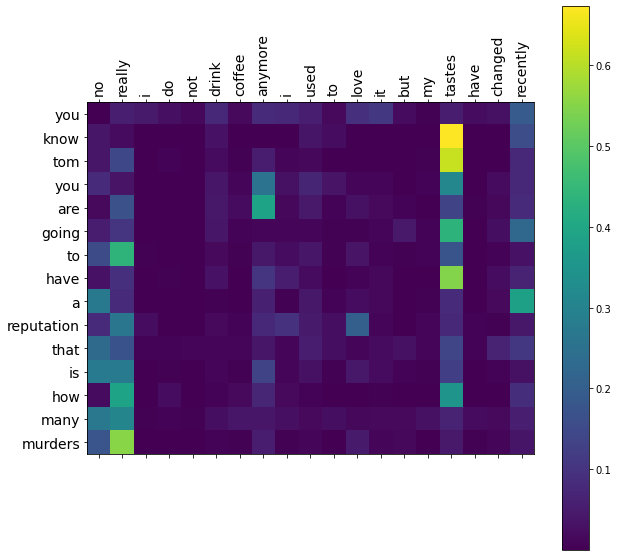

okay well maybe some other time they continue walking together


In [ ]:
#Sentence 1
i= 107
import matplotlib.pyplot as plt
translate(model_2,enc_sentences[i])
print(target_sent[i])

Input: i hate being with you
Predicted translation: you do not love me


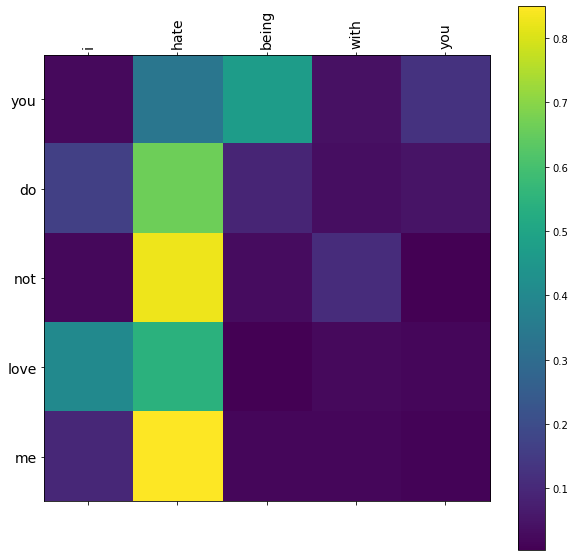

('I hate being with you', 'you do not love me')

In [ ]:
#Sentence 1
import matplotlib.pyplot as plt
translate(model_2,"I hate being with you")

Input: no i dont love you
Predicted translation: happy for me


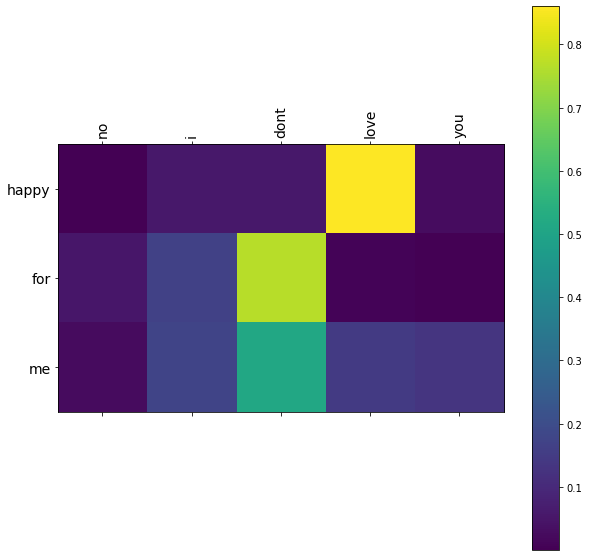

('No I dont love you', 'happy for me')

In [ ]:
#Sentence 1
import matplotlib.pyplot as plt
translate(model_2,"No I dont love you")

Input: do you like to play
Predicted translation: i do not think so


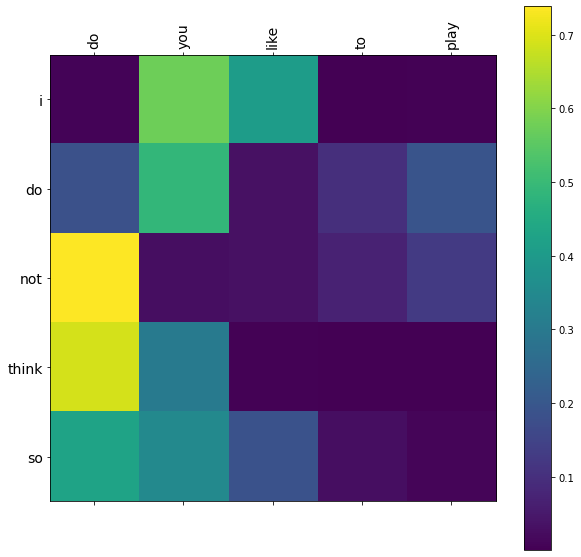

('do you like to play', 'i do not think so')

In [ ]:
#Sentence 1
import matplotlib.pyplot as plt
translate(model_2,"do you like to play")

Input: i want to kill you now
Predicted translation: you do not have to


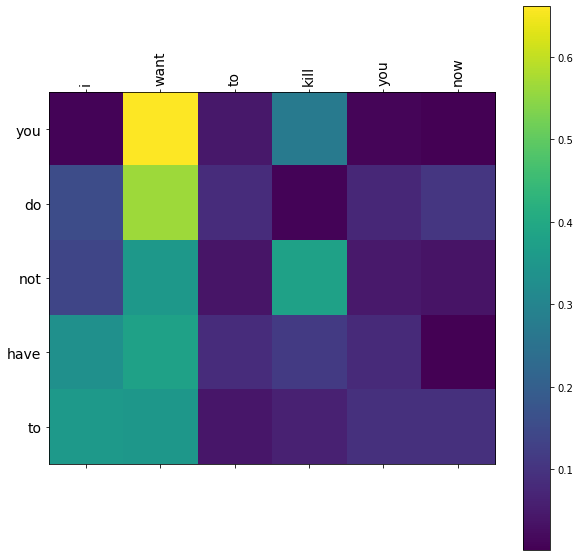

('I want to kill you now', 'you do not have to')

In [ ]:
#Sentence 1
import matplotlib.pyplot as plt
translate(model_2,"I want to kill you now")

Input: will you come with me for dinner
Predicted translation: are you sure


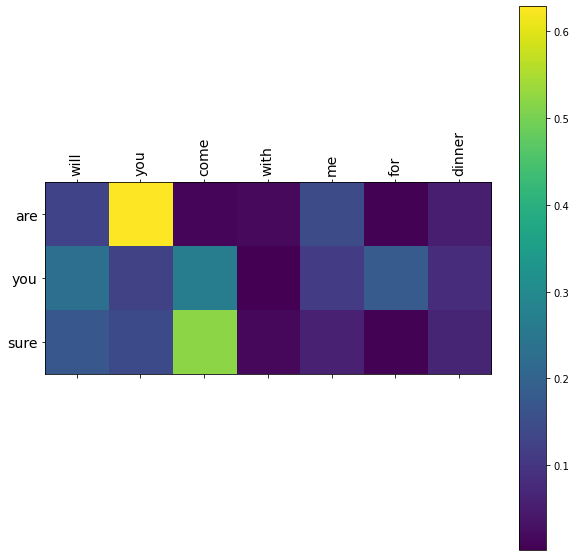

('Will you come with me for dinner', 'are you sure')

In [ ]:
#Sentence 1
import matplotlib.pyplot as plt
translate(model_2,"Will you come with me for dinner")

Input: yes we can have dinner tonight
Predicted translation: we are very excited


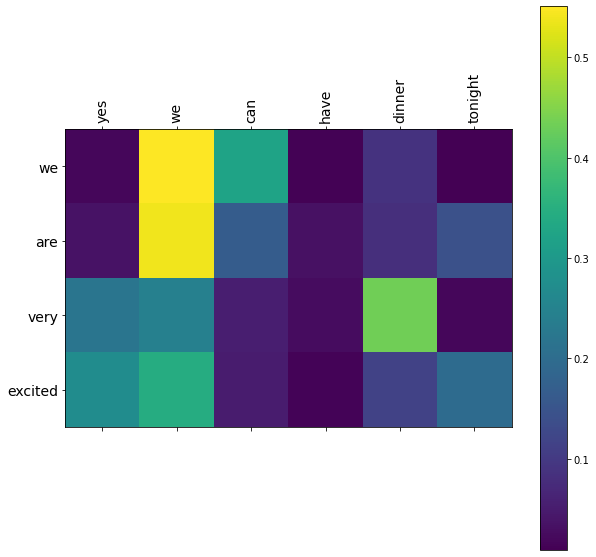

('yes we can have dinner tonight', 'we are very excited')

In [ ]:
#Sentence 1
import matplotlib.pyplot as plt
translate(model_2,"yes we can have dinner tonight")

Input: i love you idiot
Predicted translation: i will give you a friend of mine


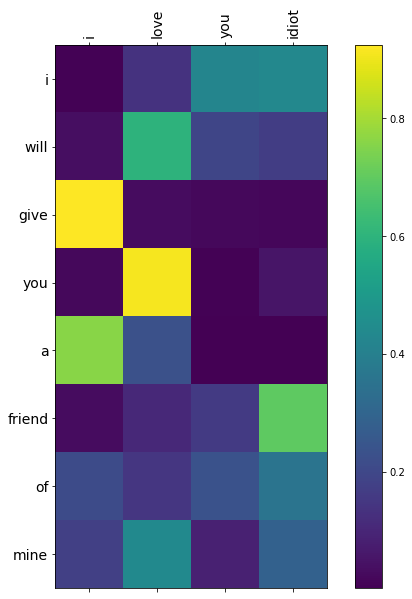

('I love you idiot', 'i will give you a friend of mine')

In [ ]:
#Sentence 1
import matplotlib.pyplot as plt
translate(model_2,"I love you idiot")

Input: bye see you soon
Predicted translation: right right i am sorry we are going to be a real nice day


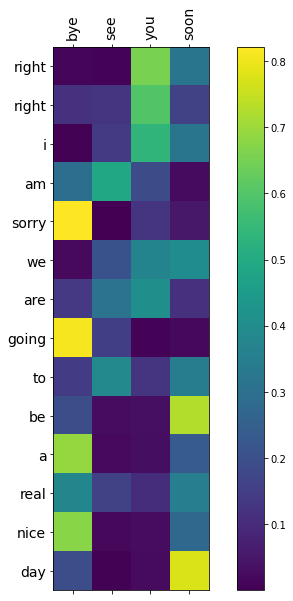

('bye see you soon',
 'right right i am sorry we are going to be a real nice day')

In [ ]:
#Sentence 1
import matplotlib.pyplot as plt
translate(model_2,"bye see you soon")

Input: i hate you never come
Predicted translation: why would i do that


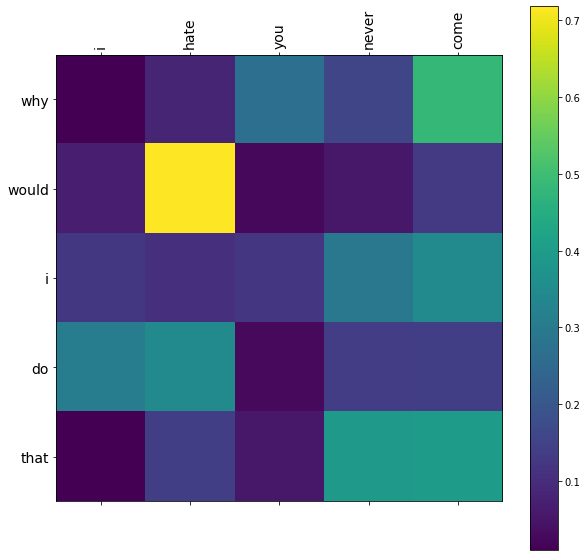

('I hate you never come', 'why would i do that')

In [ ]:
#Sentence 1
import matplotlib.pyplot as plt
translate(model_2,"I hate you never come")

Input: it was nice meating you
Predicted translation: yes i am sorry


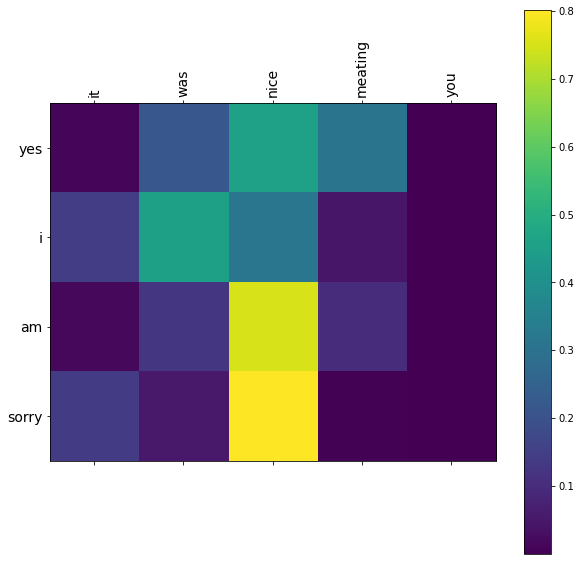

('it was nice meating you', 'yes i am sorry')

In [ ]:
#Sentence 1
import matplotlib.pyplot as plt
translate(model_2,"it was nice meating you")

Input: how are you
Predicted translation: fine thank you


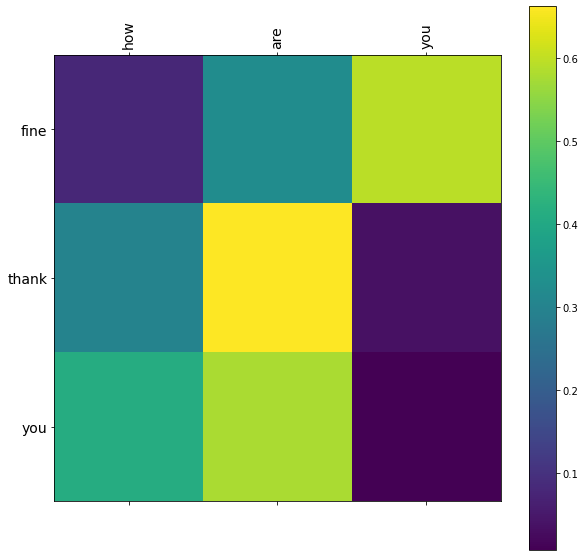

('how are you', 'fine thank you')

In [ ]:
import matplotlib.pyplot as plt
translate(model_2,"how are you")

Input: hi how are you mom
Predicted translation: my name is <unk> birthday you man are not <unk> a girl i am um <unk>


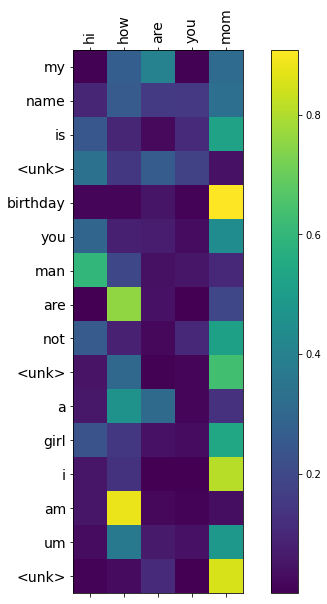

('Hi how are you mom',
 'my name is <unk> birthday you man are not <unk> a girl i am um <unk>')

In [ ]:
import matplotlib.pyplot as plt
translate(model_2,"Hi how are you mom")

Input: good night see you tomorrow
Predicted translation: good night see what is oh bring him it


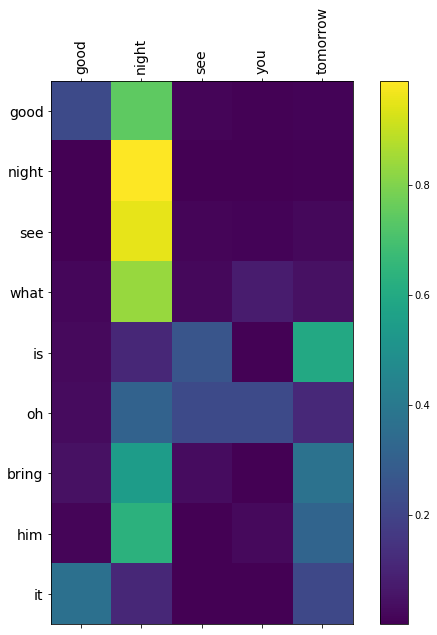

('good night see you tomorrow', 'good night see what is oh bring him it')

In [ ]:
import matplotlib.pyplot as plt
translate(model_2,"good night see you tomorrow")

Input: come back i love you
Predicted translation: i love you


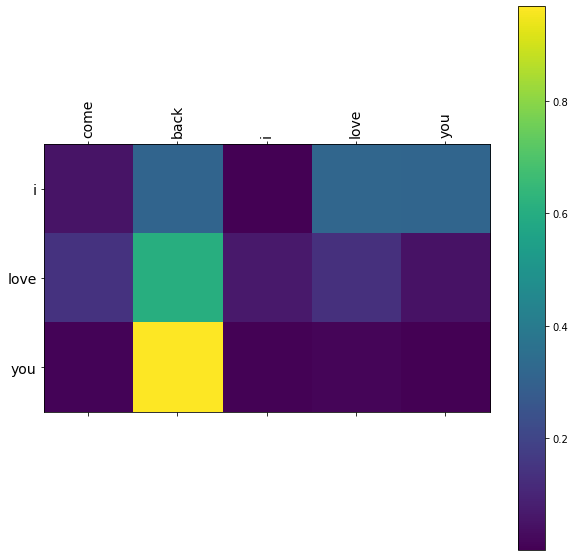

('come back i love you', 'i love you')

In [ ]:
import matplotlib.pyplot as plt
translate(model_2,"come back i love you")

Input: stay blessed be happy
Predicted translation: mr van ryan i am <unk> the world i should be happy to you


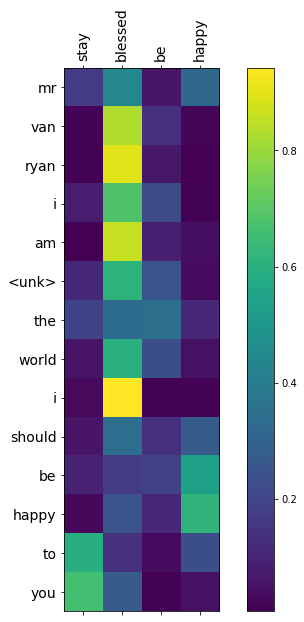

('Stay blessed be happy',
 'mr van ryan i am <unk> the world i should be happy to you')

In [ ]:
import matplotlib.pyplot as plt
translate(model_2,"Stay blessed be happy")

Input: i love you
Predicted translation: i love you


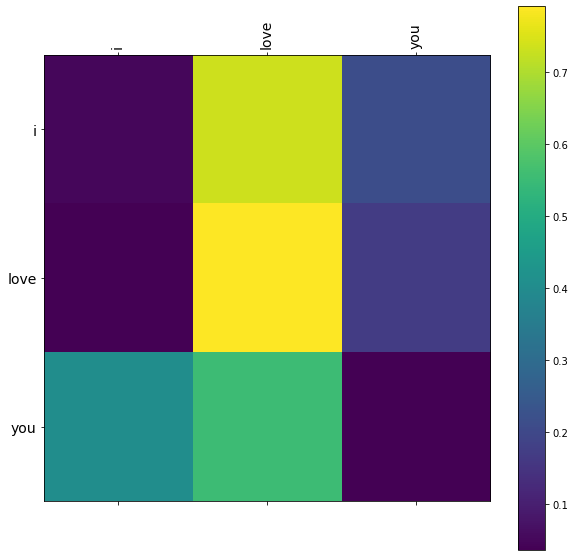

('I love you', 'i love you')

In [ ]:
import matplotlib.pyplot as plt
translate(model_2,"I love you")

Input: i hate you
Predicted translation: no no thanks wait a minute


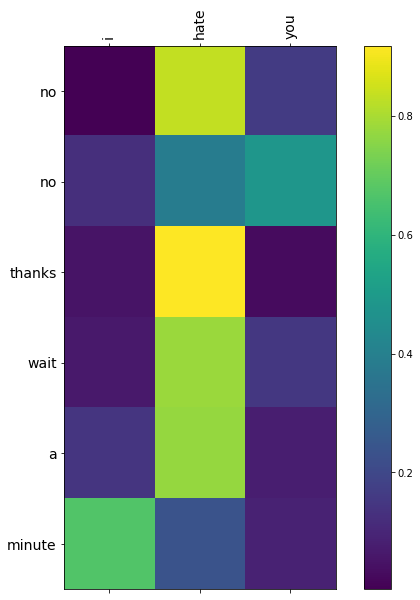

('I hate you', 'no no thanks wait a minute')

In [ ]:
import matplotlib.pyplot as plt
translate(model_2,"I hate you")

In [ ]:
scores = 0

for i in range(1000):
    pred,_,_ = predict(model_2,enc_sentences[i])
    pred = pred.split()
    ref = [target_sent[i].split(),]
    scores += bleu.sentence_bleu(ref, pred)
    
print("Average belu score for 1000 test setences :",scores/1000)

Average belu score for 1000 test setences : 0.21770011696168143
